In [9]:
# IMPORTACIÓN DE LAS BIBLIOTECAS QUE NECESITAMOS USAR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy import signal

In [25]:
# Me genero unos datos de juguete
fs = 1000 #Hz
tmax = 6 # Tiempo (segundos) de registro
t = np.linspace(1/fs,tmax,tmax*fs)

f = 5. # Hz. Acuerdense del punto para que no sean enteros!!
A = 5 # Amplitud en Volts
g = 1./3
x0 = 3

xo = A*np.exp(-g*t)*np.sin(2 * np.pi * f * t) + x0

ruido = np.random.normal(0, 0.01*A, len(xo))
x = xo + ruido

# Reemplazar por los suyos

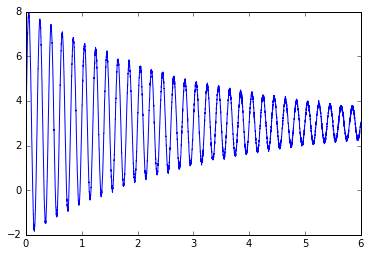

In [26]:
plt.plot(t, x)
#plt.ylim(-(A+.5), A+.5)
plt.show()


In [27]:
nventana = 30
extrema = signal.argrelmax(x,order=nventana) # Existen otros metodos, por ejemplo en https://docs.scipy.org/doc/scipy/reference/signal.html
extrema

(array([  47,  249,  448,  652,  847, 1054, 1248, 1452, 1649, 1845, 2044,
        2243, 2455, 2652, 2853, 3051, 3251, 3449, 3655, 3847, 4049, 4245,
        4443, 4648, 4850, 5045, 5245, 5443, 5646, 5854]),)

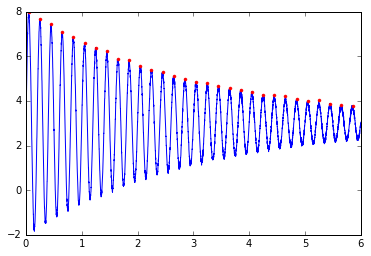

In [28]:
plt.plot(t, x,'b-')
plt.plot(t[extrema], x[extrema],'r.')
plt.show()

In [29]:
ti = t[extrema]
dt = ti[1:len(ti)]-ti[0:(len(ti)-1)]
w = 2*np.pi/dt
wprom = np.mean(w)
werr = np.std(w,ddof=1)/np.sqrt(len(w))
print('Frecuencia angular promedio (mean + s.e.m.) = %f + %f' %(wprom, werr))

Frecuencia angular promedio (mean + s.e.m.) = 31.388550 + 0.132046


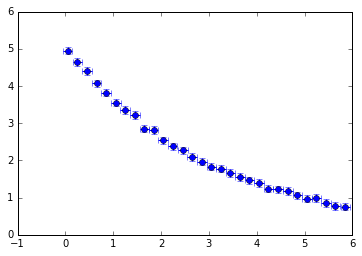

In [32]:
xi = x[extrema] - np.mean(x)

exi = 0.1
eti = 0.1
plt.errorbar(ti,xi,xerr=eti,yerr=exi,color='b',fmt='o')#,10000,fmt='-o',color='g')
plt.show()

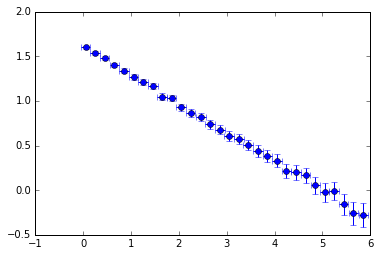

In [33]:
# Linealizo
# Modelo: x ~ A*exp(-g*t)
# ln(x) ~ ln(A*exp(-g*t)) = ln(A) + ln(exp(-g*t)) = ln(A) - g*t
# ln(x) ~ ln(A) - g*t
lxi = np.log(xi)
elxi = exi/xi
plt.errorbar(ti,lxi,xerr=eti,yerr=elxi,color='b',fmt='o')#,10000,fmt='-o',color='g')
plt.show()